In [1]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, albumentations_transform=None):
        """
        Custom PyTorch dataset for preprocessing and augmentation.
        :param image_paths: List of image file paths.
        :param albumentations_transform: Albumentations transformations.
        """
        self.image_paths = image_paths
        self.albumentations_transform = albumentations_transform

    def __len__(self):
        """Return the number of images in the dataset."""
        return len(self.image_paths)

    def __getitem__(self, idx):
        """
        Get a single image and its transformations.
        :param idx: Index of the image in the dataset.
        :return: Transformed image tensor.
        """
        # Load the image using PIL
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")  # Ensure the image is RGB

        # Convert the PIL image to numpy for Albumentations
        image_np = np.array(image)

        # Apply Albumentations transforms
        if self.albumentations_transform:
            augmented = self.albumentations_transform(image=image_np)
            image = augmented["image"]  # Get the transformed tensor

        return image


In [3]:
# Albumentations preprocessing and augmentation steps
albumentations_augmentation = A.Compose([
    A.Resize(224, 224),  # Resize to 224x224
    A.HorizontalFlip(p=0.5),  # Random horizontal flip
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),  # Random shifts, scaling, rotation
    A.RandomBrightnessContrast(p=0.2),  # Adjust brightness and contrast
    A.GaussianBlur(blur_limit=(3, 5), p=0.3),  # Add Gaussian blur
    A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalize to [-1, 1]
    ToTensorV2()  # Convert to PyTorch tensor (C, H, W)
])


In [4]:
# Provide the image path
image_paths = [
    r"C:\Users\user\Documents\!TA\!TA\cornealtopography\Independent Test Set\Independent Test Set\Keratoconus\case1\KCN_1_CT_A.jpg"
]

# Create the dataset
dataset = CustomImageDataset(
    image_paths=image_paths,
    albumentations_transform=albumentations_augmentation
)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)


Batch shape: torch.Size([1, 3, 224, 224])


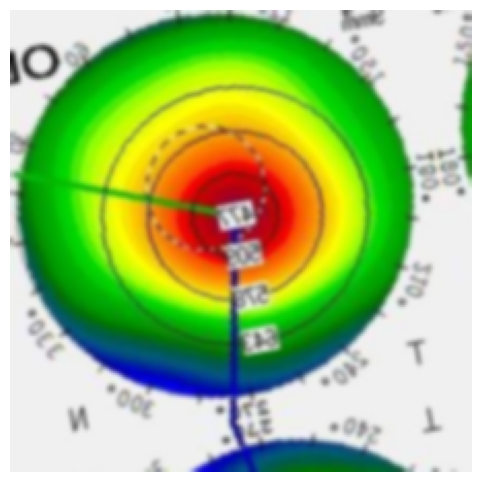

In [5]:
# Visualize one batch of augmented images
for batch in dataloader:
    print("Batch shape:", batch.shape)  # Debug: Verify the batch shape
    images = batch.permute(0, 2, 3, 1).numpy()  # Change shape from (batch_size, C, H, W) to (batch_size, H, W, C)
    images = (images * 0.5) + 0.5  # Undo normalization (convert from [-1, 1] to [0, 1])

    # Plot each image in the batch
    plt.figure(figsize=(6, 6))
    for i in range(images.shape[0]):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])  # Matplotlib expects (H, W, C)
        plt.axis("off")
    plt.show() #show plot
    break
